In [42]:
"""https://herbwood.tistory.com/6
https://iq.opengenus.org/object-detection-using-r-cnn/
https://wikidocs.net/62217"""

'https://herbwood.tistory.com/6\nhttps://iq.opengenus.org/object-detection-using-r-cnn/\nhttps://wikidocs.net/62217'

## Library Load

In [43]:
'''
brew install libomp (for OSX)
pip install torchtext -U
'''
import torch
import torchvision
from torchvision import models
import torchvision.transforms as T

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches

print('pytorch', torch.__version__)
print('torchvision', torchvision.__version__)

pytorch 1.10.1
torchvision 0.11.2


# key point R-CNN 구현

### 이미지 사이즈 및 임계값 설정

In [44]:
IMG_SIZE = 480
THRESHOLD = 0.95

###  model set

In [46]:
model = models.detection.keypointrcnn_resnet50_fpn(pretrained=True).eval()

### Load Image

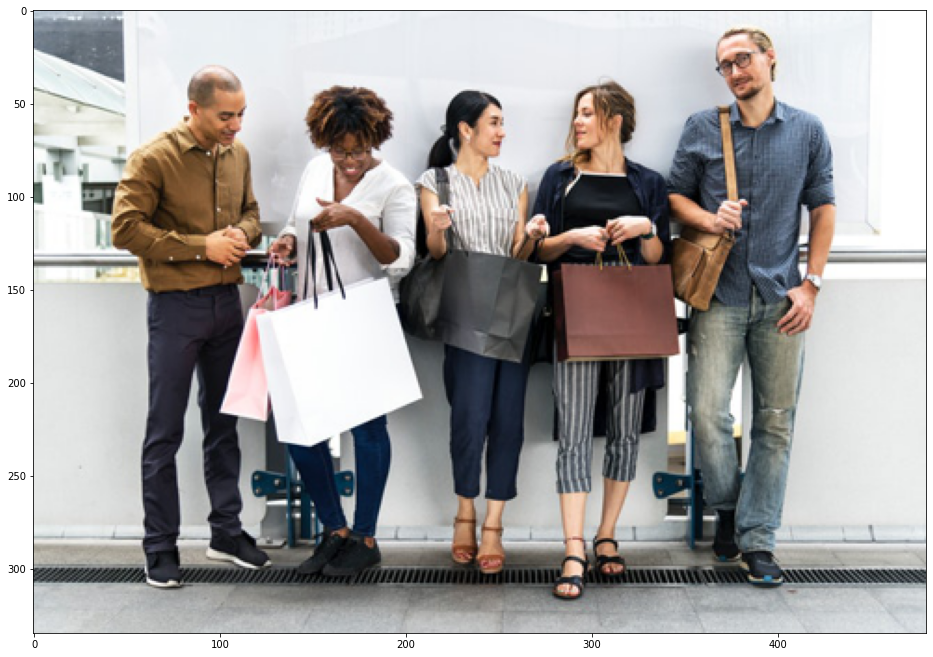

In [48]:
import tensorflow as tf
file_path = tf.keras.utils.get_file('07.jpg', 'https://github.com/kairess/torchvision_walkthrough/raw/master/imgs/07.jpg')
img = Image.open(file_path)
img = img.resize((IMG_SIZE, int(img.height * IMG_SIZE / img.width)))

plt.figure(figsize=(16, 16))
plt.imshow(img)

### Image to Tensor

In [49]:
trf = T.Compose([
    T.ToTensor()
])

input_img = trf(img)

print(input_img.shape)

torch.Size([3, 335, 480])


torch.Size([3, 335, 480])
dict_keys(['boxes', 'labels', 'scores', 'keypoints', 'keypoints_scores'])


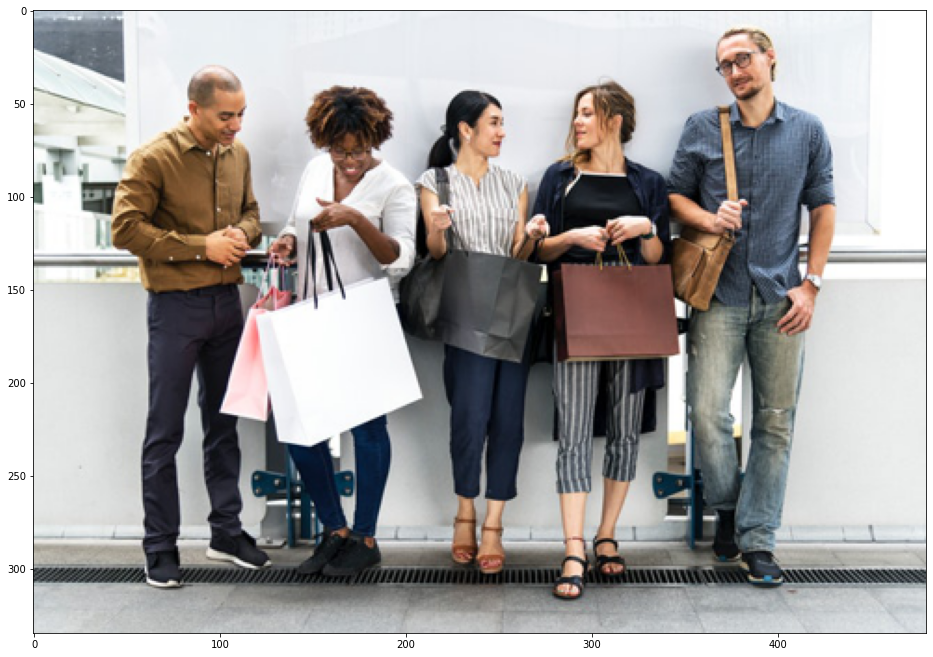

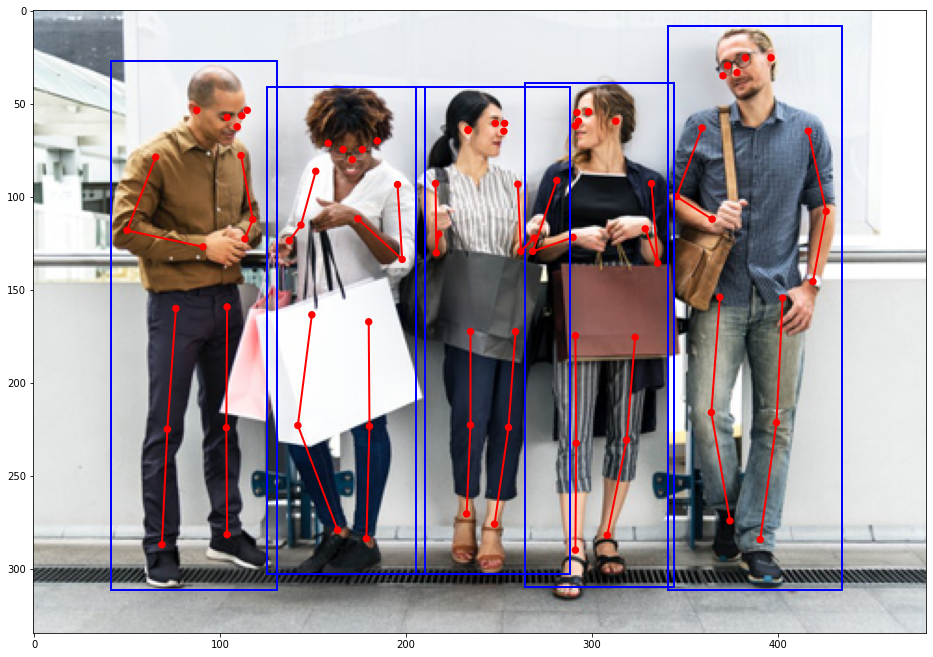

In [45]:
#Image to Tensor

trf = T.Compose([
    T.ToTensor()
])

input_img = trf(img)

print(input_img.shape)

#Inference

out = model([input_img])[0]

print(out.keys())

codes = [
    Path.MOVETO,
    Path.LINETO,
    Path.LINETO
]

fig, ax = plt.subplots(1, figsize=(16, 16))
ax.imshow(img)

for box, score, keypoints in zip(out['boxes'], out['scores'], out['keypoints']):
    score = score.detach().numpy()

    if score < THRESHOLD:
        continue

    box = box.detach().numpy()
    keypoints = keypoints.detach().numpy()[:, :2]

    rect = patches.Rectangle((box[0], box[1]), box[2]-box[0], box[3]-box[1], linewidth=2, edgecolor='b', facecolor='none')
    ax.add_patch(rect)

    # 17 keypoints
    for k in keypoints:
        circle = patches.Circle((k[0], k[1]), radius=2, facecolor='r')
        ax.add_patch(circle)

    # draw path
    # left arm
    path = Path(keypoints[5:10:2], codes)
    line = patches.PathPatch(path, linewidth=2, facecolor='none', edgecolor='r')
    ax.add_patch(line)

    # right arm
    path = Path(keypoints[6:11:2], codes)
    line = patches.PathPatch(path, linewidth=2, facecolor='none', edgecolor='r')
    ax.add_patch(line)

    # left leg
    path = Path(keypoints[11:16:2], codes)
    line = patches.PathPatch(path, linewidth=2, facecolor='none', edgecolor='r')
    ax.add_patch(line)

    # right leg
    path = Path(keypoints[12:17:2], codes)
    line = patches.PathPatch(path, linewidth=2, facecolor='none', edgecolor='r')
    ax.add_patch(line)

pytorch 1.10.1
torchvision 0.11.2
torch.Size([1, 21, 719, 480])
(719, 480)
[ 0  8 15 16]


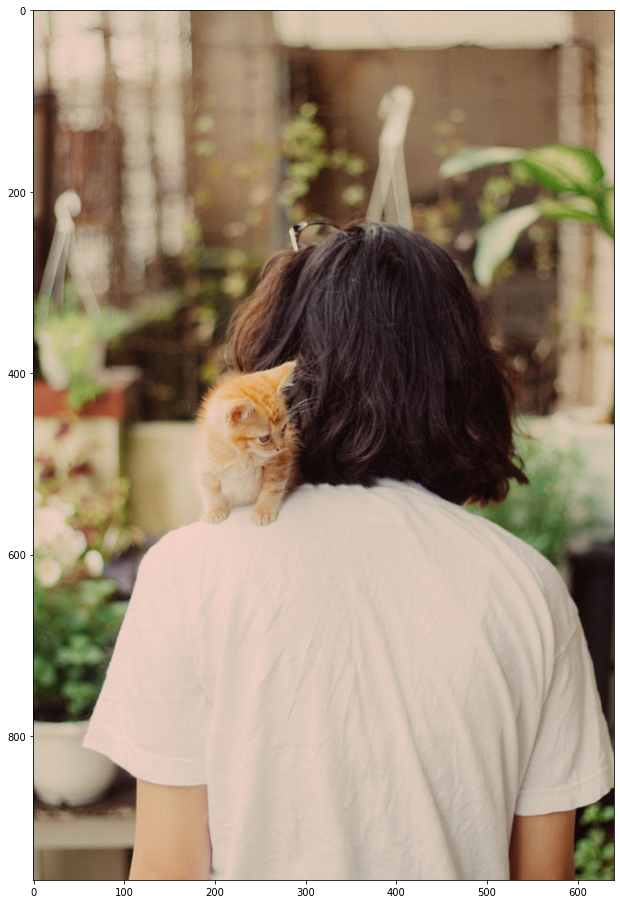

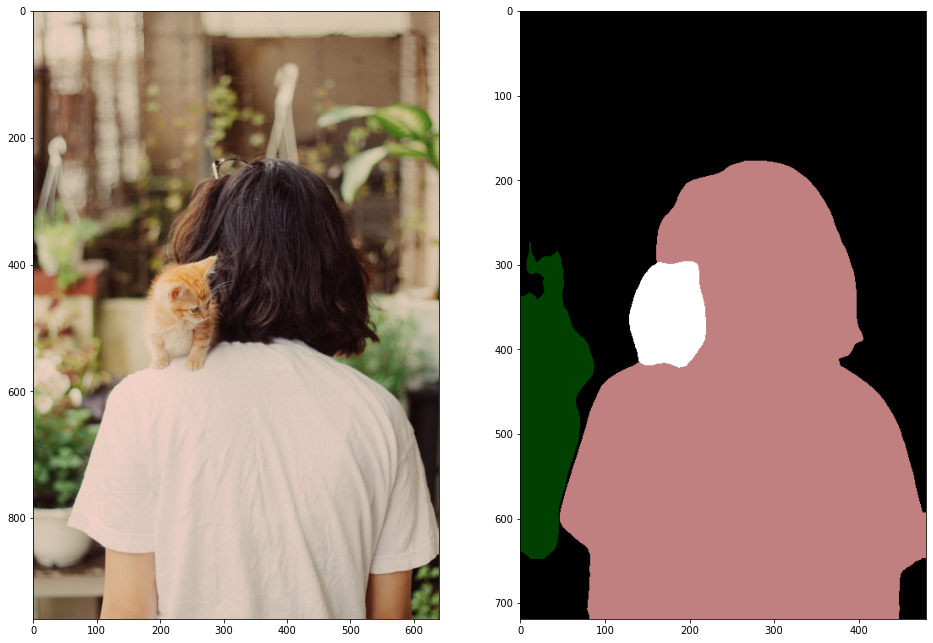

In [23]:
'''
brew install libomp (for OSX)
pip install torchtext -U
'''
import torch
import torchvision
from torchvision import models
import torchvision.transforms as T

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

print('pytorch', torch.__version__)
print('torchvision', torchvision.__version__)

IMG_SIZE = 480

COLORS = np.array([
    (0, 0, 0),       # 0=background
    (128, 0, 0),     # 1=aeroplane
    (0, 128, 0),     # 2=bicycle
    (128, 128, 0),   # 3=bird
    (0, 0, 128),     # 4=boat
    (128, 0, 128),   # 5=bottle
    (0, 128, 128),   # 6=bus
    (128, 128, 128), # 7=car
    (255, 255, 255), # 8=cat
    (192, 0, 0),     # 9=chair
    (64, 128, 0),    # 10=cow
    (192, 128, 0),   # 11=dining table
    (64, 0, 128),    # 12=dog
    (192, 0, 128),   # 13=horse
    (64, 128, 128),  # 14=motorbike
    (192, 128, 128), # 15=person
    (0, 64, 0),      # 16=potted plant
    (128, 64, 0),    # 17=sheep
    (0, 192, 0),     # 18=sofa
    (128, 192, 0),   # 19=train
    (0, 64, 128)     # 20=tv/monitor
])

#Download Model

deeplab = models.segmentation.deeplabv3_resnet101(pretrained=True).eval()

#Load Image

#img = Image.open('imgs/03.jpg')
import tensorflow as tf
file_path = tf.keras.utils.get_file('03.jpg', 'https://github.com/kairess/torchvision_walkthrough/raw/master/imgs/03.jpg')
img = Image.open(file_path)

plt.figure(figsize=(16, 16))
plt.imshow(img)

#Image to Tensor

trf = T.Compose([
    T.Resize(IMG_SIZE),
#     T.CenterCrop(IMG_SIZE), # make square image
    T.ToTensor(), 
    T.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

input_img = trf(img).unsqueeze(0)

#Inference

out = deeplab(input_img)['out']

print(out.shape)

#Extract Class Map

out = torch.argmax(out.squeeze(), dim=0)
out = out.detach().cpu().numpy()

print(out.shape)
print(np.unique(out))

#Class Map to Segmentation Map

def seg_map(img, n_classes=21):
    rgb = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)

    for c in range(n_classes):
        idx = img == c

        rgb[idx] = COLORS[c]

    return rgb

out_seg = seg_map(out)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 16))
ax[0].imshow(img)
ax[1].imshow(out_seg)